<a href="https://colab.research.google.com/github/WarpHero/AI_Training/blob/main/Autoencoder_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder
---
- MNIST dataset 사용 (Tensorflow Tutorial 참고)

//loss가 음수가 나오는 문제 발생

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- 최종 목적
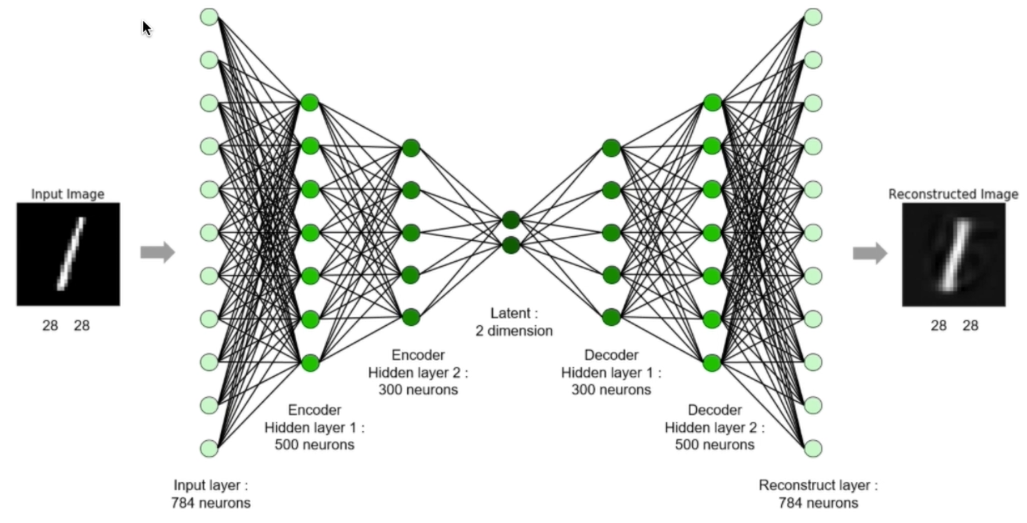

In [5]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model

In [11]:
input_img=Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(64, activation='relu')(input_img) # 1st endcode layer
encoded = Dense(2, activation='relu')(encoded) # 2nd endcode layer, Latent layer

# "decoded" is the lossy reconstruction of the input
decoded=Dense(64, activation='relu')(encoded)
decoded=Dense(784, activation='sigmoid')(decoded) # sigmoid는 출력값의 범위가 [0, 1] 사이 실수가 됨

# this model maps an input to its reconstruction
autoencoder=Model(input_img, decoded)

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
x_train=train_images.reshape((train_images.shape[0], 784)) # reshape : shape을 바꾸고 싶은 대로 써주면 된다.
# train_images.shape ; (6만 , 28, 28)
# numpy의 좋은 점 중 하나는 784 대신 -1을 쓰면 알아서 784로 해석해 줌
# 즉, x_train=train_images.reshape((train_images.shape[0], -1))과 동일한 표현 

In [9]:
x_train.shape #x_trian.shape이 원하는 형태로 변경 됨 (6만 , 28, 28)->(6만, 784)

(60000, 784)

In [10]:
# test data 역시 같은 방식으로 reshape 해준다.
x_test=test_images.reshape((test_images.shape[0], -1))
x_test.shape

(10000, 784)

In [15]:
# 학습 후 fitting
autoencoder.fit(x_train, x_train, # autoencoder 는 input값과 output 값이 같으므로
                epochs=50,
                batch_size=256,
                validation_split=0.1)

Epoch 1/50
211/211 [==============================] - 3s 12ms/step - loss: -27002465557143509617386471817216.0000 - val_loss: -27920552838778529763758534819840.0000
Epoch 2/50
211/211 [==============================] - 3s 12ms/step - loss: -27458131459221016416658374262784.0000 - val_loss: -28386163364648186502621570269184.0000
Epoch 3/50
211/211 [==============================] - 3s 12ms/step - loss: -27911275542038807099471839625216.0000 - val_loss: -28849191624967146393567433326592.0000
Epoch 4/50
211/211 [==============================] - 3s 12ms/step - loss: -28361636677619844905925131370496.0000 - val_loss: -29308684986189553108806455525376.0000
Epoch 5/50
211/211 [==============================] - 2s 12ms/step - loss: -28808554792466620248488859926528.0000 - val_loss: -29765218897005543211825797005312.0000
Epoch 6/50
211/211 [==============================] - 3s 12ms/step - loss: -29252868881097945679810271379456.0000 - val_loss: -30219255167078209490970195525632.0000
Epoch 7/50

왜 loss가 음수가 나오지?????
뭔가 문제가 생긴 것 같음

In [18]:
x_test.shape

(10000, 784)

In [19]:
decoded_imgs=autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
decoded_imgs.shape

(10000, 784)

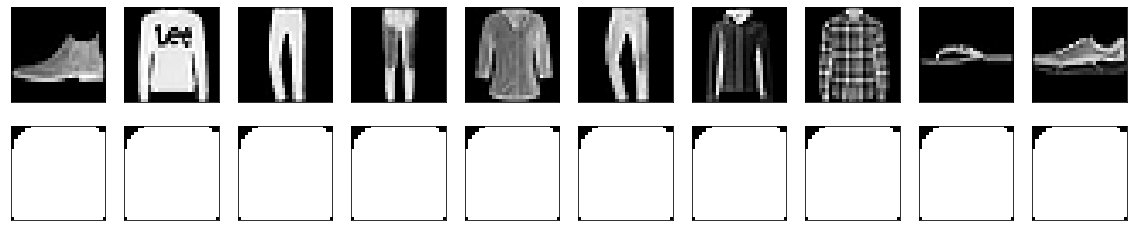

In [23]:
# display code
# use matplotlib : visualization Framework
import matplotlib.pyplot as plt

n=10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  #display original
  ax=plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax=plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

- output data가 제대로 나타나지 않은 모습
- optimizer와 loss 함수 문제인 듯
- 원래 예상한 결과값
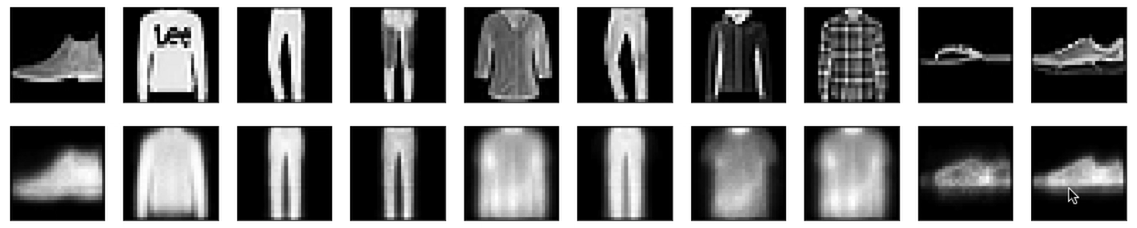

In [24]:
# 학습이 된 Latent Vector Visualization
# 마지막 encoded 값을 추출해야 함 -> model을 새로 만들어서 추출한다.

encoder=Model(input_img, encoded) # input_imgs 에서 encoded만 뽑아서 encoder로 정의
encoded_imgs=encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
encoded_imgs.shape # Latent vector is 2-dim 

(10000, 2)

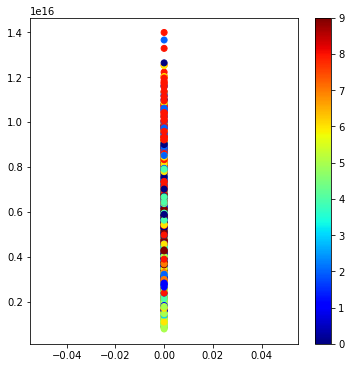

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1], c=test_labels, cmap=plt.cm.jet)
# 0번째 값을 x축, 1번째 값을 y축에 놓고 점을 찍는다.(2차원이므로)
plt.colorbar()
plt.show()

- 정상적인 기댓값
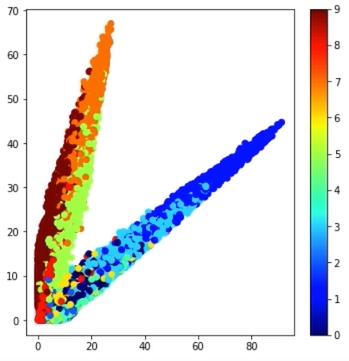

In [27]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [28]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)